In [1]:
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('data/spin_ladder/spin_ladder_70_2.csv')

In [3]:
df.head()

,N,M,delta,q,mu,J,delta_q,t,theta,mzm_states
0,70.0,2.0,0.939394,1.650129,1.090909,2.181818,5.267721,0.000000,2.030929,0.0
1,70.0,2.0,0.575758,4.125324,2.696970,0.757576,0.888531,1.898990,1.205864,0.0
2,70.0,2.0,1.878788,2.729060,0.606061,0.393939,5.204254,0.787879,5.838920,0.0
3,70.0,2.0,2.787879,5.648520,2.181818,1.515152,1.269330,0.969697,3.934924,0.0
4,70.0,2.0,2.606061,5.394654,2.545455,0.818182,1.459730,1.353535,3.363725,0.0


In [4]:
df.groupby('mzm_states').count()

,N,M,delta,q,mu,J,delta_q,t,theta
mzm_states,,,,,,,,,
0.0,970766,970766,970766,970766,970766,970766,970766,970766,970766
2.0,22773,22773,22773,22773,22773,22773,22773,22773,22773
4.0,6461,6461,6461,6461,6461,6461,6461,6461,6461


In [5]:
# Take 10% of the data with zero MZM states and all the data with non-zero MZM states
df = df[df['mzm_states'] == 0].sample(frac=0.05).append(df[df['mzm_states'] > 0])
df.head()

<ipython-input-5-27c66cf03668>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df[df['mzm_states'] == 0].sample(frac=0.05).append(df[df['mzm_states'] > 0])


,N,M,delta,q,mu,J,delta_q,t,theta,mzm_states
333761,70.0,2.0,1.121212,3.236792,2.272727,2.636364,3.363725,0.161616,1.586663,0.0
505529,70.0,2.0,1.030303,0.888531,1.878788,0.090909,4.252257,1.030303,1.840529,0.0
611216,70.0,2.0,0.818182,5.458121,1.515152,0.121212,2.157862,1.393939,0.761598,0.0
709183,70.0,2.0,0.212121,3.109859,0.606061,0.939394,2.855993,1.696970,5.648520,0.0
395877,70.0,2.0,2.757576,3.490659,2.818182,2.666667,6.156252,1.414141,0.000000,0.0


In [6]:
df.groupby('mzm_states').count()

,N,M,delta,q,mu,J,delta_q,t,theta
mzm_states,,,,,,,,,
0.0,48538,48538,48538,48538,48538,48538,48538,48538,48538
2.0,22773,22773,22773,22773,22773,22773,22773,22773,22773
4.0,6461,6461,6461,6461,6461,6461,6461,6461,6461


In [7]:
df['mzm_exists'] = df['mzm_states'] > 0

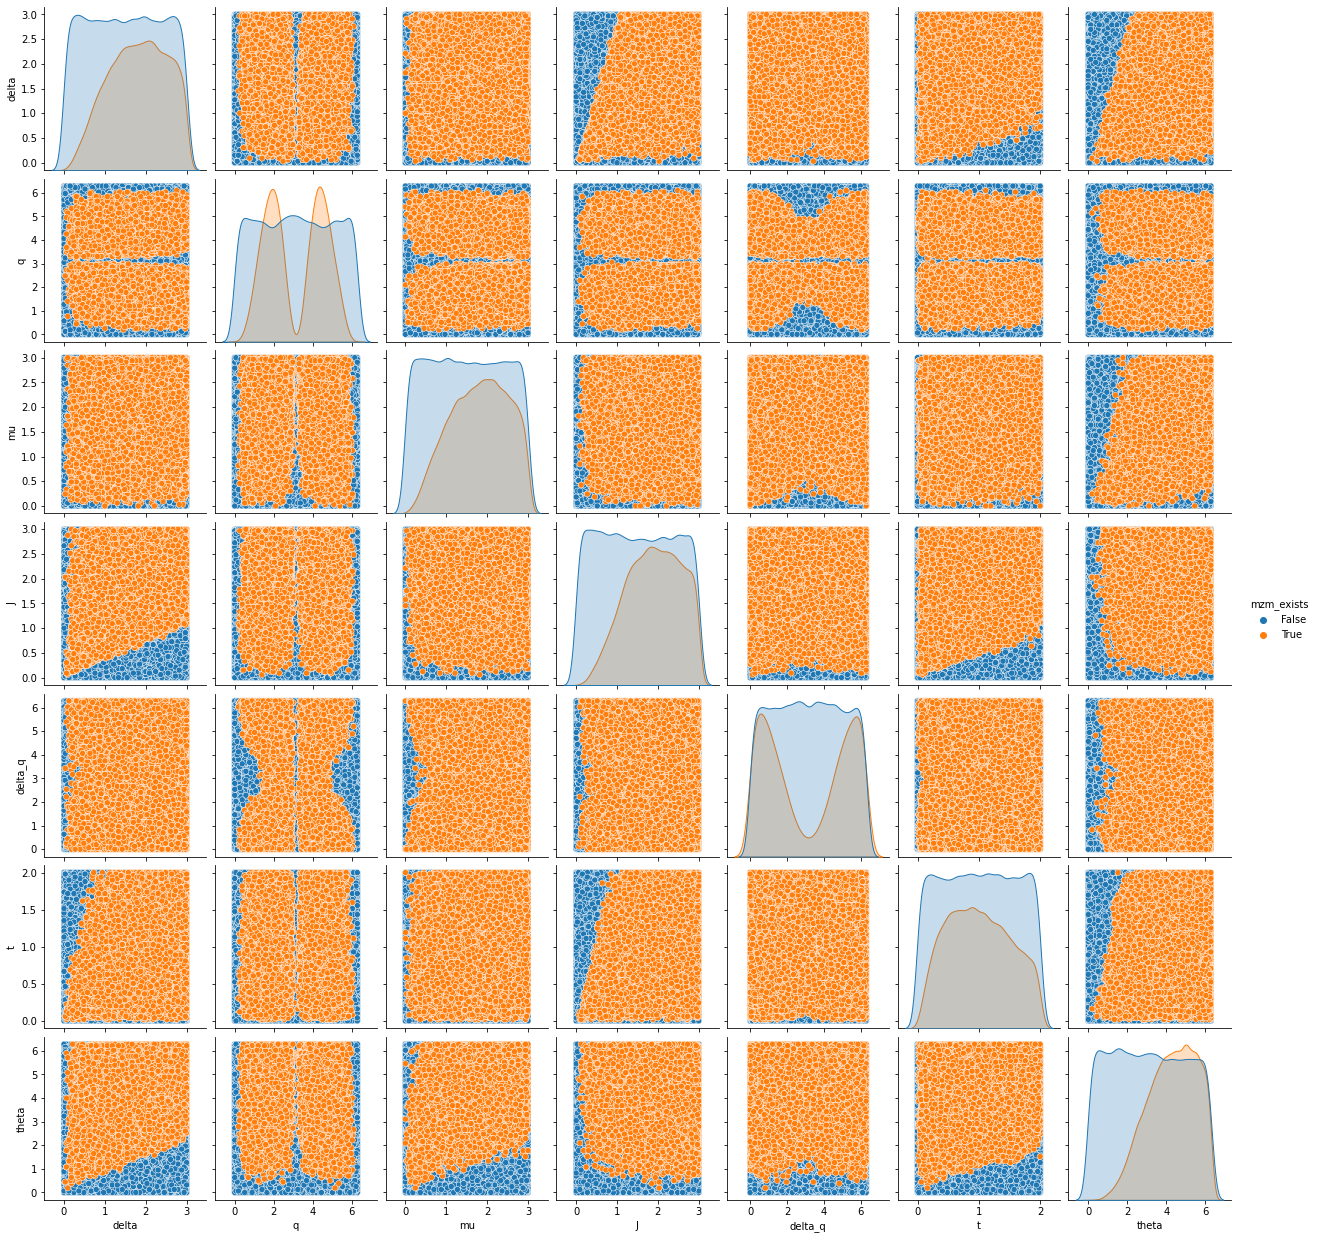

In [8]:
import seaborn as sns

mzm = df[df['mzm_exists'] == True]

# Plot the distribution of the MZM states across different features
sns.pairplot(df, hue='mzm_exists', vars=['delta', 'q', 'mu', 'J', 'delta_q', 't', 'theta'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix

In [10]:
X = df[['N', 'M', 'delta', 'q', 'mu', 'J', 'delta_q', 't', 'theta']]
y = df['mzm_exists']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = DecisionTreeClassifier(max_depth=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'Balanced accuracy: {balanced_accuracy_score(y_train, y_pred)}')
print(f'F1 score: {f1_score(y_train, y_pred, average="weighted")}')

Balanced accuracy: 0.9734287157726917
F1 score: 0.9697814365297754


In [16]:
y_pred = model.predict(X_test)

print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted")}')

Balanced accuracy: 0.8849356650850391
F1 score: 0.8850987433335624


In [13]:
confusion_matrix(y_test, y_pred)

array([[8346, 1356],
       [ 513, 5340]], dtype=int64)

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

model = RandomForestClassifier(max_depth=15, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'Balanced accuracy: {balanced_accuracy_score(y_train, y_pred)}')
print(f'F1 score: {f1_score(y_train, y_pred, average="weighted")}')

y_pred = model.predict(X_test)

print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted")}')

Balanced accuracy: 0.9572790769230728
F1 score: 0.9480480362197148
Balanced accuracy: 0.9119216781038557
F1 score: 0.9077502808012907


In [19]:
from tqdm import tqdm

best_acc = 0
best_depth = 0
best_n_estimators = 1

for depth in tqdm(range(1, 30), desc='Model optimization'):
    for n_estimators in range(1, 200, 10):
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = balanced_accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_depth = depth
            best_n_estimators = n_estimators

print(f'Best depth: {best_depth}')
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best accuracy: {best_acc}')

Model optimization: 100%|██████████| 29/29 [41:18<00:00, 85.47s/it] 

Best depth: 26
Best n_estimators: 51
Best accuracy: 0.9279535012675526


In [20]:
model = RandomForestClassifier(max_depth=best_depth, n_estimators=best_n_estimators)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'Balanced accuracy: {balanced_accuracy_score(y_train, y_pred)}')
print(f'F1 score: {f1_score(y_train, y_pred, average="weighted")}')

y_pred = model.predict(X_test)

print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted")}')

confusion_matrix(y_test, y_pred)

Balanced accuracy: 0.9968199608610567
F1 score: 0.9960341212196975
Balanced accuracy: 0.924228635585449
F1 score: 0.92478768480109


array([[8976,  726],
       [ 449, 5404]], dtype=int64)

In [17]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'Balanced accuracy: {balanced_accuracy_score(y_train, y_pred)}')
print(f'F1 score: {f1_score(y_train, y_pred, average="weighted")}')

y_pred = model.predict(X_test)

print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted")}')

Balanced accuracy: 0.8303349190629121
F1 score: 0.8361858470882889
Balanced accuracy: 0.8299410595668925
F1 score: 0.8348358443062397
